<a href="https://colab.research.google.com/github/okvironi/Regression-for-predicted-apple-quality/blob/main/PR_Day10_Andre_Okviron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment Day 10 - Career Preparation**
#### REGRESION FOR APPLE Quality Prediction
##### **ML 2: Andre Okvironi**
---
##### Ketentuan Tugas :
1. Dibebaskan untuk men-download Dataset dari Kaggle atau sumber data lainnya, pilih untuk kasus supervised atau unsupervised.
2. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
3. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
4. Upload Dataset yang digunakan ke Kaggle
5. Upload file code dan ppt (jika ada) ke dalam github repository + file readme pada github.
6. Tugas ini bersifat individu, dikumpulkan ke LMS dalam bentuk **link githubnya saja**.
---
dataset: /content/drive/MyDrive/DIBIMBING.ID/DAY 10/apple_quality.csv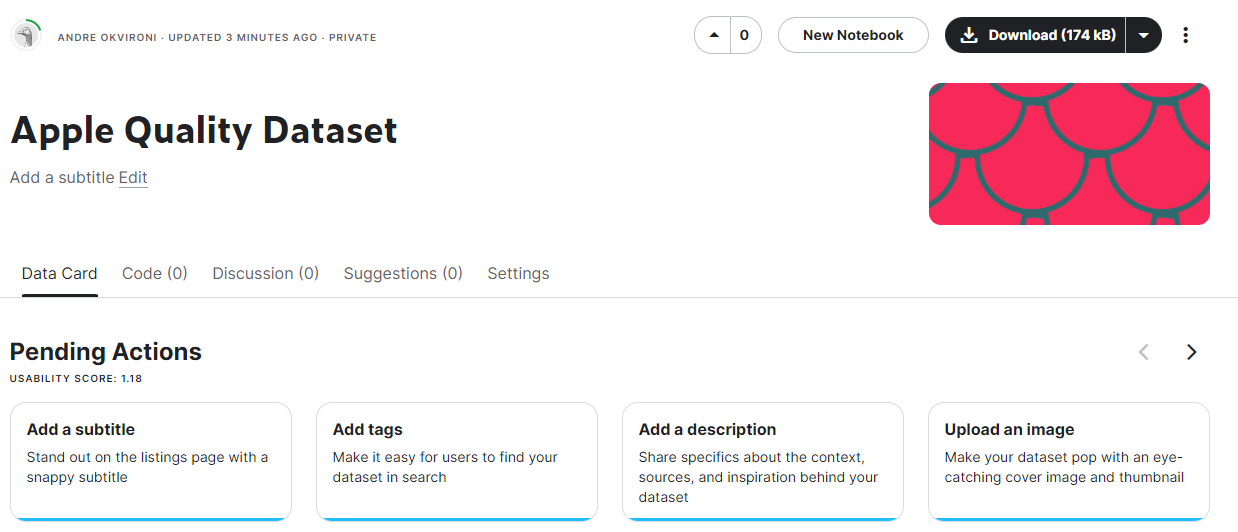

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
# read the dataset
data_apple = pd.read_csv('/content/drive/MyDrive/DIBIMBING.ID/DAY 10/apple_quality.csv')
data_apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [88]:
data_apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


#####Handling Duplicate

In [68]:
#mengecek panjang baris dari dataset
len(data_apple)

4001

In [69]:
#mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat
len(data_apple) - len(data_apple.drop_duplicates())

0

In [70]:
len(data_apple.drop_duplicates()) / len(data_apple)

#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

#####Handling Missing Value

In [89]:
#cek missing value
data_apple.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [90]:
for column in data_apple.columns:
    print(f"============= {column} =================")
    display(data_apple[column].value_counts())
    print()

============= A_id =================


0.0       1
2671.0    1
2658.0    1
2659.0    1
2660.0    1
         ..
1338.0    1
1339.0    1
1340.0    1
1341.0    1
3999.0    1
Name: A_id, Length: 4000, dtype: int64


============= Size =================


-3.970049    1
-3.844134    1
-4.411655    1
-1.480046    1
 0.749942    1
            ..
-2.385353    1
 0.612499    1
 0.862280    1
 2.181630    1
 0.278540    1
Name: Size, Length: 4000, dtype: int64


============= Weight =================


-2.512336    1
-2.729138    1
 2.702494    1
-0.326744    1
-2.590200    1
            ..
-2.367245    1
-3.353272    1
-1.644647    1
-3.755985    1
-1.715505    1
Name: Weight, Length: 4000, dtype: int64


============= Sweetness =================


 5.346330    1
-0.812468    1
-0.708549    1
-1.453041    1
-1.227472    1
            ..
-1.600530    1
-0.636006    1
 0.202496    1
 0.043771    1
 0.121217    1
Name: Sweetness, Length: 4000, dtype: int64


============= Crunchiness =================


-1.012009    1
 1.390671    1
-2.162584    1
 0.898155    1
 0.322952    1
            ..
 1.851129    1
 1.037675    1
 1.099122    1
 0.013852    1
-1.154075    1
Name: Crunchiness, Length: 4000, dtype: int64


============= Juiciness =================


 1.844900    1
 1.839132    1
-0.664962    1
 1.372992    1
-1.046933    1
            ..
 1.759377    1
 1.838079    1
-0.818240    1
 4.854059    1
 1.266677    1
Name: Juiciness, Length: 4000, dtype: int64


============= Ripeness =================


 0.329840    1
 5.411911    1
 0.751173    1
 0.762387    1
-0.030211    1
            ..
 1.508037    1
-1.629855    1
 3.290145    1
-0.718882    1
-0.776571    1
Name: Ripeness, Length: 4000, dtype: int64


============= Acidity =================


-0.491590483                         1
0.416518576                          1
1.223084441                          1
2.190636353                          1
5.125138503                          1
                                    ..
-0.08899782                          1
-0.3815496                           1
4.67363368                           1
-0.76858734                          1
Created_by_Nidula_Elgiriyewithana    1
Name: Acidity, Length: 4001, dtype: int64


============= Quality =================


good    2004
bad     1996
Name: Quality, dtype: int64

In [91]:
#hapus data missing
data_apple.dropna(axis=0, inplace=True)
data_apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [92]:
#handling untuk prediksi quality
data_apple['Quality']=data_apple['Quality'].map({'good': 1, 'bad':0})

In [93]:
data_apple['Quality']

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [94]:
target=data_apple['Quality']

In [95]:
target

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

#####Exploratory Data Analysis

In [96]:
# melihat cuplikan informasi mengenai dataset
data_apple.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 312.5+ KB


In [100]:
# statistika deskriptif mengenai dataset kita
data_apple.describe(include='all')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000,4000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.491590483,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,NaN,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,NaN,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,NaN,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,NaN,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,NaN,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,NaN,1.000000


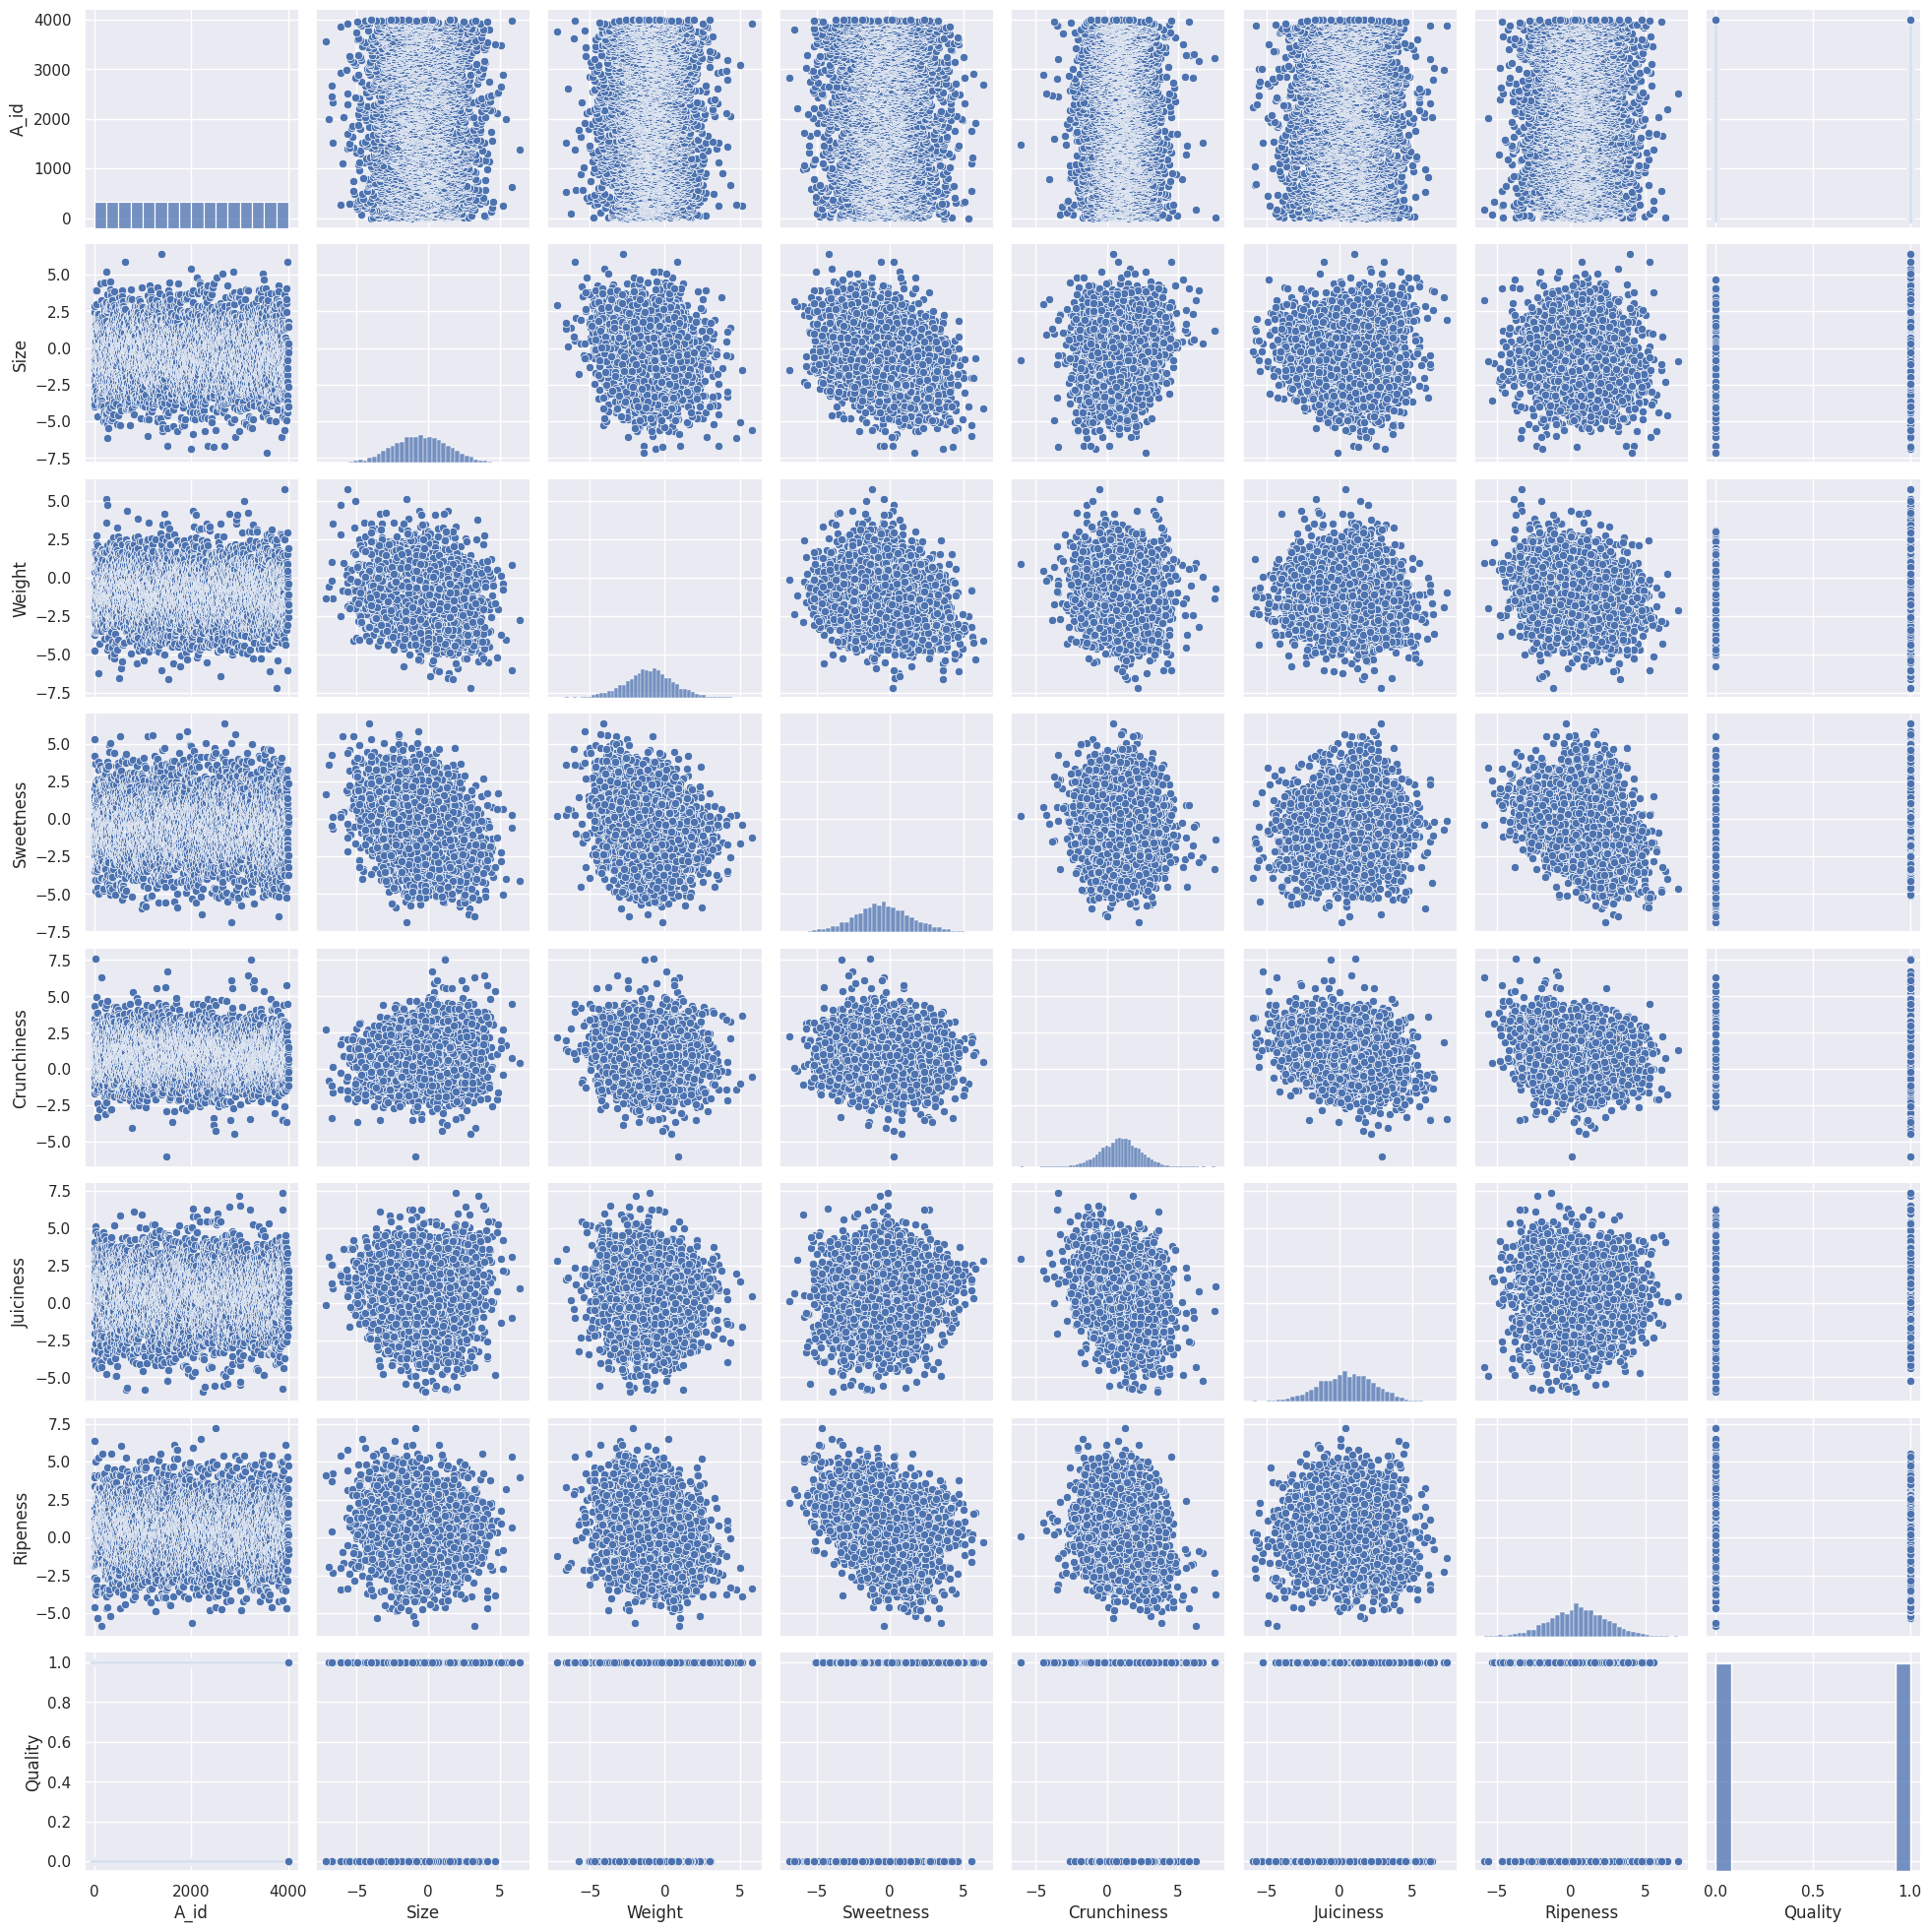

In [97]:
sns.pairplot(data_apple)

<Axes: ylabel='Frequency'>

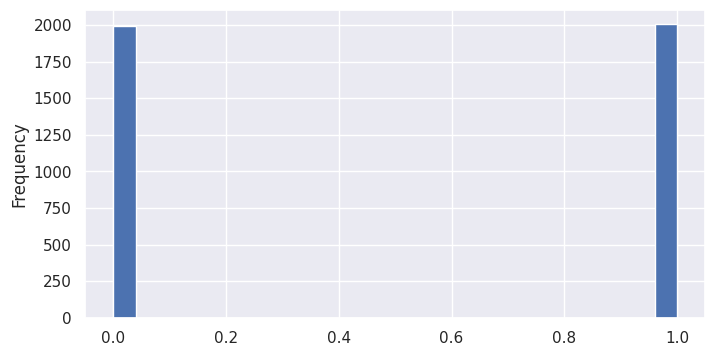

In [98]:
data_apple['Quality'].plot.hist(bins=25, figsize=(8,4))

<Axes: ylabel='Density'>

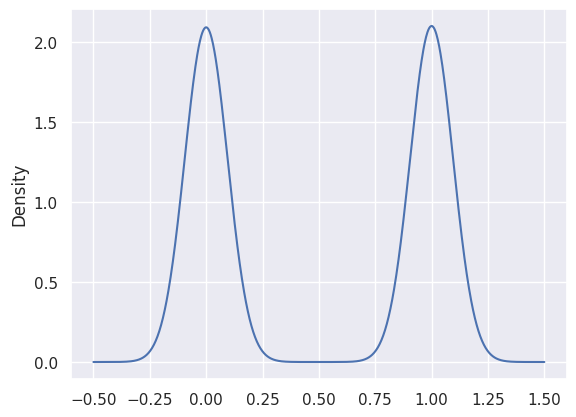

In [101]:
data_apple['Quality'].plot.density()

Tinjau korelasi antar variabel menggunakan correlation heatmap

In [102]:
data_apple.corr()

<ipython-input-102-f71f3ee0964c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_apple.corr()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742,0.004875
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.244007
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.001421
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.250998
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,-0.012376
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.260223
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.264315
Quality,0.004875,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,1.000000


<ipython-input-104-cb09b0fd968b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_apple.corr(),annot=True,linewidths=2)


<Axes: >

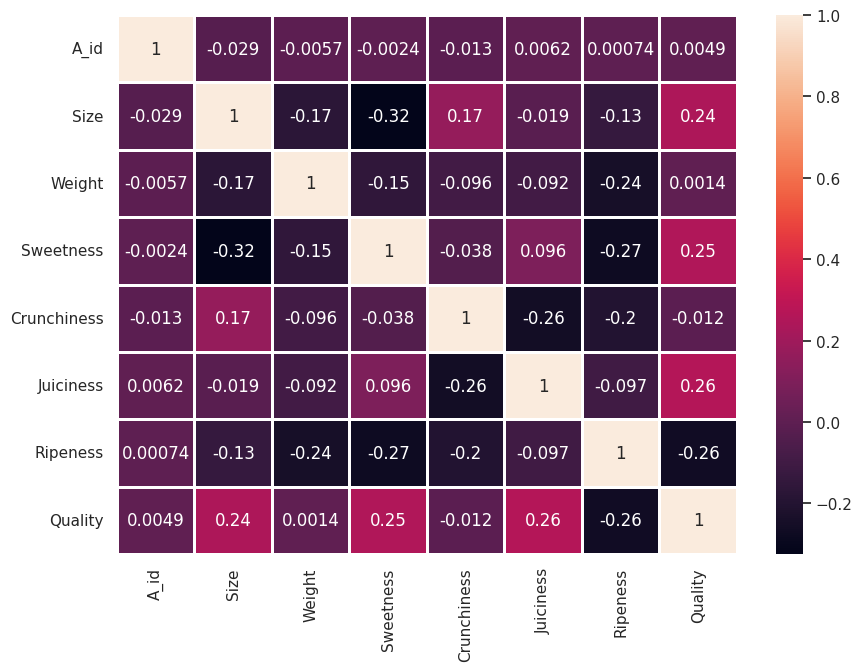

In [104]:
plt.figure(figsize=(10,7))
sns.heatmap(data_apple.corr(),annot=True,linewidths=2)

#####Data Wrangling

mempersiapkan dataset untuk training dengan cara memisahkan prediktor dan target variabel

In [105]:
data_apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [106]:
# Drop data yang tidak numerik dan tidak kategorikal
'''
df = df.drop(columns=['Address'])

df.head()
'''

#data sudah numerik semua --> tidak ada yang di drop

"\ndf = df.drop(columns=['Address'])\n\ndf.head()\n"

In [107]:
columns = list(data_apple.columns)

# ambil kolom prediktor dan simpan di variable predictor
predictor = columns[:-1]

# ambil kolom target dan simpan di variable target
target = columns[-1]

In [108]:
X = data_apple[predictor]

In [109]:
y = data_apple[target]

Kemudian lakukan split train-test

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("Train size :", X_train.shape)
print("Test size :", X_test.shape)

Train size : (2800, 8)
Test size : (1200, 8)


#####Training Regression Model

In [111]:
# menginisiasi object lm --> dari class LinearRegression
lm = LinearRegression()

In [112]:
# melakukan training dengan menggunakan X_train dan y_train
lm.fit(X_train,y_train)

LinearRegression()

In [113]:
print("intercept dari model kita: ", lm.intercept_)

intercept dari model kita:  0.6122442221921536


In [114]:
print("coefficient dari linear model kita: ", lm.coef_)

coefficient dari linear model kita:  [ 1.10079897e-08  1.12029275e-01  4.70788651e-02  1.03524234e-01
  1.00696304e-02  7.65557649e-02 -1.99500794e-02 -4.97909695e-02]


In [115]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
A_id,1.100799e-08
Size,1.120293e-01
Weight,4.707887e-02
Sweetness,1.035242e-01
Crunchiness,1.006963e-02
Juiciness,7.655576e-02
Ripeness,-1.995008e-02
Acidity,-4.979097e-02


##### Training Result Analysis

Coefficient, standard error, and T-statistic for each predictor

Text(0.5, 1.0, 'Crunchiness vs. Quality')

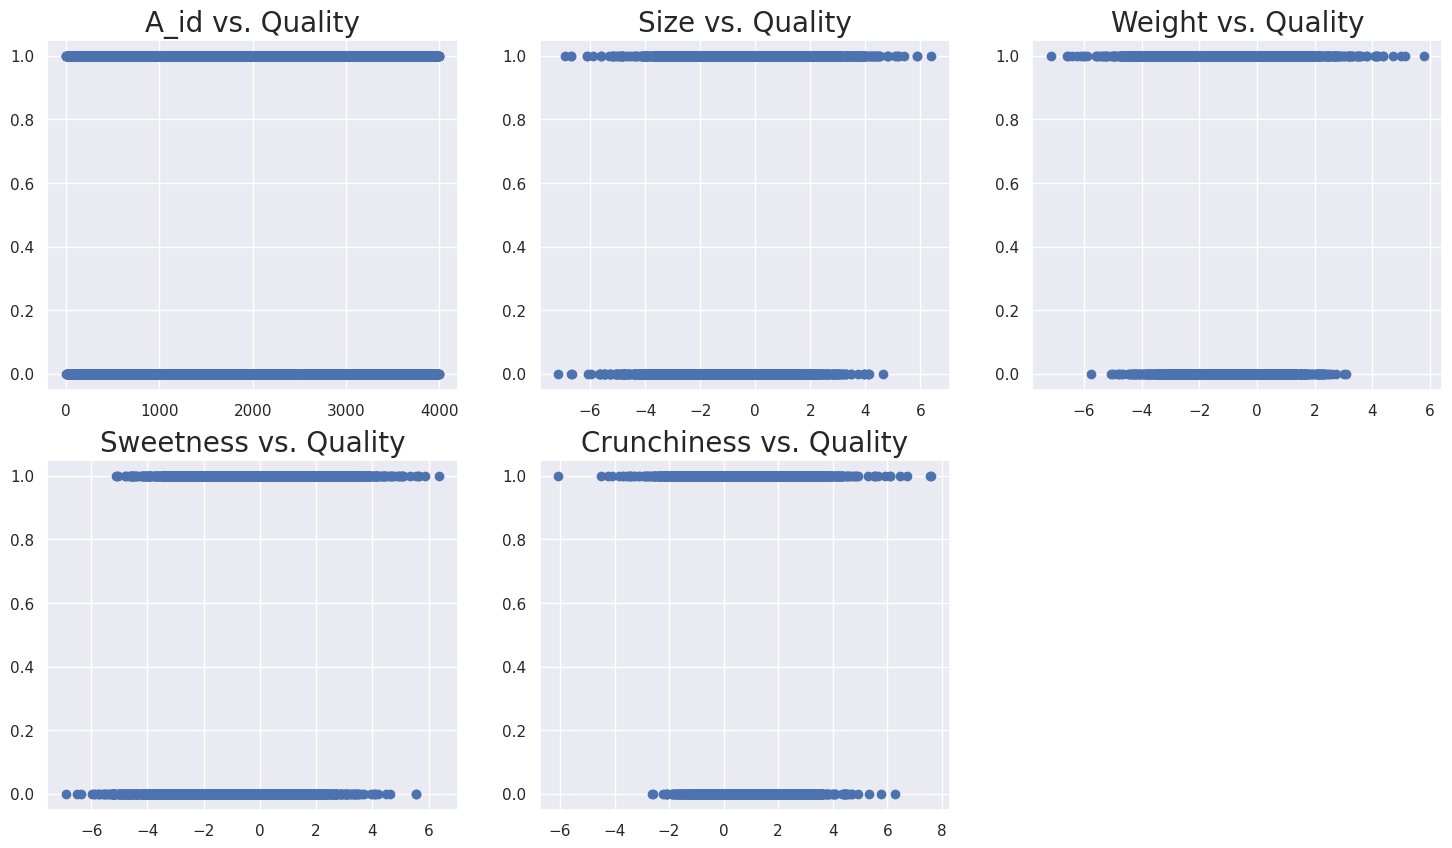

In [121]:
# Visualisasi prediktor vs target

l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(data_apple[l[0]],data_apple['Quality'])
ax0.set_title(l[0]+" vs. Quality", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(data_apple[l[1]],data_apple['Quality'])
ax1.set_title(l[1]+" vs. Quality",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(data_apple[l[2]],data_apple['Quality'])
ax2.set_title(l[2]+" vs. Quality",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(data_apple[l[3]],data_apple['Quality'])
ax3.set_title(l[3]+" vs. Quality",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(data_apple[l[4]],data_apple['Quality'])
ax4.set_title(l[4]+" vs. Quality",fontdict={'fontsize':20})

#####Evaluasi Model dan Uji Asumsi
Setelah melakukan training dan menghasilkan hasil evaluasi, kita perlu melakukan uji asumsi agar dapat memastikan bahwa model kita dapat diandalkan dan valid

In [126]:
predictions = lm.predict(X_test)

# menghitung residual dari hasil regresi kita
residuals = (y_test - predictions)

residuals

1203   -0.423139
2827    0.309924
2325   -0.103893
3916    0.493462
3821   -0.322447
          ...   
949     0.492413
117    -0.064731
2573   -0.318582
2294   -0.517881
1738   -0.349658
Name: Quality, Length: 1200, dtype: float64

In [127]:
# melakukan uji normalitas dengan shapiro wilk
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print("shapiro test stat : ", shapiro_test_stat)
print("shapiro p value :", shapiro_p_value)

shapiro test stat :  0.9742239117622375
shapiro p value : 8.477534673605527e-14


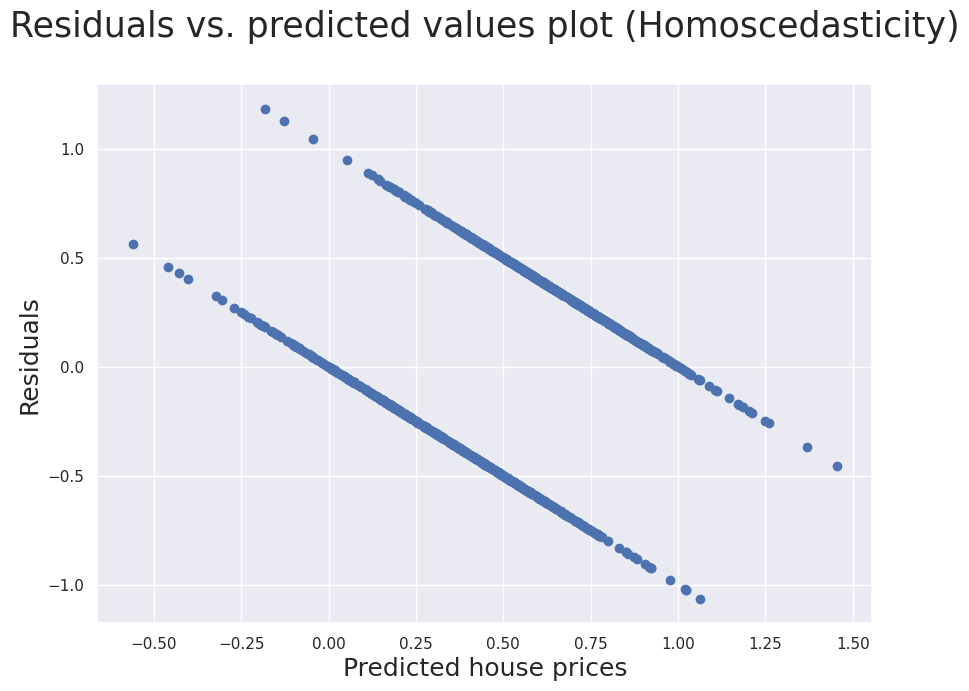

In [128]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

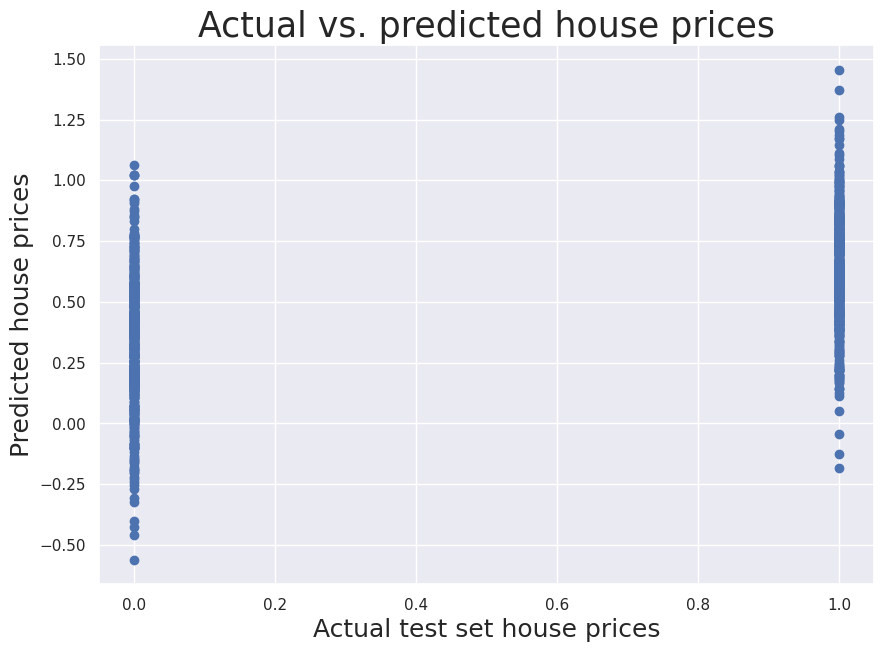

In [129]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

###TEST CODE FROM KAGGLE

In [131]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [132]:
data=pd.read_csv('/content/drive/MyDrive/DIBIMBING.ID/DAY 10/apple_quality.csv')

In [133]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [134]:
#handling missing value
data.dropna(axis=0, inplace=True)

In [135]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [136]:
data['Quality']=data['Quality'].map({'good': 1, 'bad':0})

In [137]:
data['Quality']

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [138]:
target=data['Quality']

In [139]:
target

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [140]:
data.shape

(4000, 9)

In [141]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [142]:
traindata=data.drop('Quality', axis=1)

In [143]:
features=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']

In [144]:
features

['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']

In [145]:
traindata=traindata[features]

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [147]:
traindata, valdata, targetdata, targetvaldata=train_test_split(traindata, target, test_size=0.2, random_state=42)

In [148]:
print(traindata.shape, valdata.shape, targetdata.shape, targetvaldata.shape)

(3200, 6) (800, 6) (3200,) (800,)


In [149]:
traindata.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
dtype: int64

In [150]:
model=LogisticRegression()
model1=RandomForestClassifier(n_estimators=100, max_depth=13, random_state=11)
model2=XGBClassifier()
model3=LGBMClassifier()

In [151]:
model1

RandomForestClassifier(max_depth=13, random_state=11)

In [152]:
model2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [153]:
model3

LGBMClassifier()

In [154]:
traindata=pd.get_dummies(traindata)
valdata=pd.get_dummies(valdata).dropna()

In [155]:
traindata.shape

(3200, 6)

In [156]:
targetdata.shape

(3200,)

In [157]:
model=model3.fit (traindata, targetdata)

[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250


In [158]:
valdata.shape

(800, 6)

In [159]:
targetvaldata.shape

(800,)

In [160]:
predi=model3.predict(valdata)

In [171]:
mapping_dict = {1: 'good', 0: 'bad'}
mapped_arr = np.array([mapping_dict[i] for i in predi])

In [162]:
mapped_arr

array(['good', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad'

In [163]:
res=pd.DataFrame(mapped_arr)

In [164]:
res

,0
0,good
1,good
2,bad
3,good
4,bad
...,...
795,bad
796,good
797,good
798,good


In [165]:
accuracy=accuracy_score(targetvaldata, predi)

In [166]:
accuracy

0.88875

###TEST CODE BY KAGGLE V2

In [181]:
!pip install optuna lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.7 MB/s eta 0:00:00


In [182]:
import numpy as np
import pandas as pd
import optuna
from optuna.samplers import TPESampler
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, roc_auc_score

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')


In [183]:
datav2=pd.read_csv('/content/drive/MyDrive/DIBIMBING.ID/DAY 10/apple_quality.csv')

In [185]:
datav2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [187]:
datav2 = pd.read_csv('/content/drive/MyDrive/DIBIMBING.ID/DAY 10/apple_quality.csv')
datav2.dropna(inplace = True)
datav2.drop('A_id', axis = 1, inplace = True)
datav2['Acidity'] = datav2['Acidity'].astype(float)

datav2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [191]:
datav2.duplicated().sum()

0

In [192]:
datav2.isnull().mean()

Size           0.0
Weight         0.0
Sweetness      0.0
Crunchiness    0.0
Juiciness      0.0
Ripeness       0.0
Acidity        0.0
Quality        0.0
dtype: float64

#####Data Exploratory

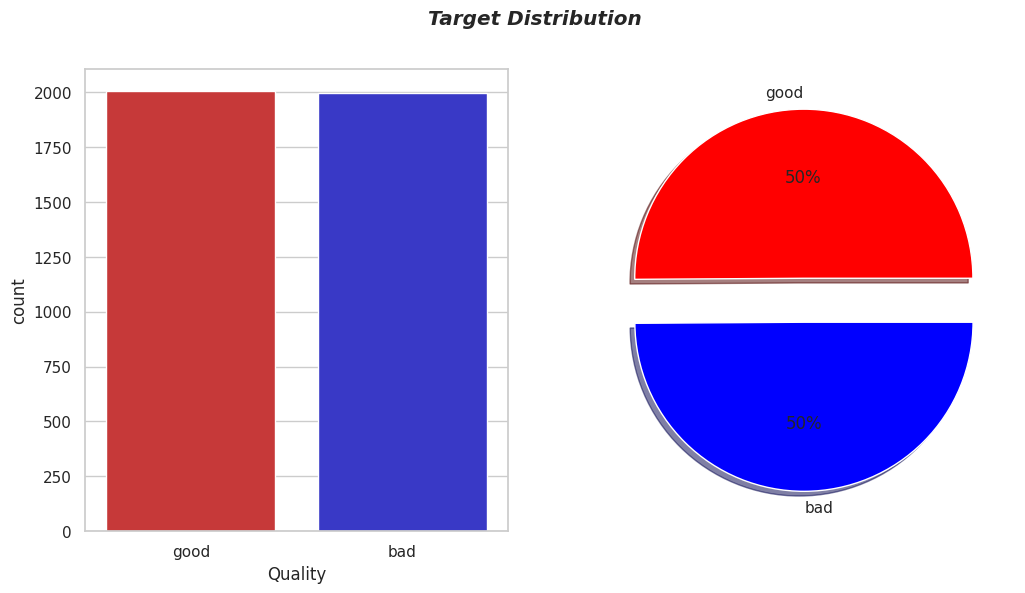

In [193]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))


sns.countplot(x = datav2['Quality'], saturation = 0.55, palette = ['red', 'blue'], ax = ax[0])
ax[1].pie(datav2['Quality'].value_counts(), labels = datav2['Quality'].unique(),
          autopct = '%2.f%%', shadow = True, explode = [0.13] * len(datav2['Quality'].value_counts().index), colors = ['red', 'blue'])
plt.suptitle('Target Distribution', style = 'italic', weight = 'bold')
plt.show()

In [195]:
fig1 = px.scatter(datav2, x="Weight", y="Size", color="Quality", title = 'Weight x Size')
fig1.show()

fig2 = px.scatter(datav2, x="Sweetness", y="Crunchiness", color="Quality", title = 'Sweetness x Crunchiness')
fig2.show()

fig3 = px.scatter_3d(datav2, x="Juiciness", y="Ripeness", z = 'Acidity',  color="Quality", title = 'Juiciness x Ripeness x Acidity')
fig3.show()

#####Data Split

In [196]:
X = datav2.drop('Quality', axis = 1)
y = datav2['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.12, random_state = 0)
X_train.shape, X_test.shape

((3520, 7), (480, 7))

#####Base Model

######LGBM

In [197]:
model = LGBMClassifier(verbose = -1, random_state = 0)

model.fit(X_train, y_train)

print('Model Accuracy on the train set: {:.5f}'.format(model.score(X_train, y_train)))
print('Model Accuracy on the test set: {:.5f}'.format(model.score(X_test, y_test)))

Model Accuracy on the train set: 0.98722
Model Accuracy on the test set: 0.89583


######CatBoost

In [198]:
model = CatBoostClassifier(verbose = 0, random_state = 0)

model.fit(X_train, y_train)

print('Model Accuracy on the train set: {:.5f}'.format(model.score(X_train, y_train)))
print('Model Accuracy on the test set: {:.5f}'.format(model.score(X_test, y_test)))

Model Accuracy on the train set: 0.96733
Model Accuracy on the test set: 0.88958


######Gradient Boosting



In [199]:
model = GradientBoostingClassifier(verbose = 0, random_state = 0)

model.fit(X_train, y_train)

print('Model Accuracy on the train set: {:.5f}'.format(model.score(X_train, y_train)))
print('Model Accuracy on the test set: {:.5f}'.format(model.score(X_test, y_test)))

Model Accuracy on the train set: 0.89886
Model Accuracy on the test set: 0.86458


#####Model Tuning

######LGBM

In [200]:
def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'binary_error',
        'verbosity': -1,
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    return accuracy


study = optuna.create_study(direction = 'maximize', sampler=TPESampler(seed=88))
study.optimize(objective, n_trials = 60)

[I 2024-02-21 17:21:43,853] A new study created in memory with name: no-name-037d9790-a9f4-4606-8e9e-566e5b7558e4
[I 2024-02-21 17:21:49,909] Trial 0 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 651, 'boosting_type': 'dart', 'num_leaves': 230, 'max_depth': 8, 'min_child_samples': 73, 'learning_rate': 0.027206756153967112, 'feature_fraction': 0.5336916773097167, 'bagging_fraction': 0.5050927139944138, 'bagging_freq': 4, 'lambda_l1': 2.283735925520123, 'lambda_l2': 1.2273628768669547e-08}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-02-21 17:21:50,004] Trial 1 finished with value: 0.8416666666666667 and parameters: {'n_estimators': 99, 'boosting_type': 'gbdt', 'num_leaves': 225, 'max_depth': 5, 'min_child_samples': 42, 'learning_rate': 0.014550954606526884, 'feature_fraction': 0.46821230830948907, 'bagging_fraction': 0.8607281108795143, 'bagging_freq': 3, 'lambda_l1': 0.006517696564890678, 'lambda_l2': 1.969201930973439e-08}. Best is trial 0 with v

In [201]:
print('Best Accuracy: {:.5f}'.format(study.best_value))

Best Accuracy: 0.91042


In [202]:
best_params_lgbm = study.best_params
best_params_lgbm

{'n_estimators': 538,
 'boosting_type': 'dart',
 'num_leaves': 212,
 'max_depth': 8,
 'min_child_samples': 5,
 'learning_rate': 0.09697485944004708,
 'feature_fraction': 0.962124650807449,
 'bagging_fraction': 0.974804993912954,
 'bagging_freq': 4,
 'lambda_l1': 0.23604127807577083,
 'lambda_l2': 3.745835226883741e-05}

In [203]:
optuna.visualization.plot_optimization_history(study)

In [204]:
optuna.visualization.plot_param_importances(study)

######CatBoost

In [205]:
def objective(trial):

    params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])
    }

    model = CatBoostClassifier(**params, verbose=False)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)

    return accuracy

study = optuna.create_study(direction='maximize', sampler = TPESampler(seed=88))
study.optimize(objective, n_trials=180)

[I 2024-02-21 17:27:37,735] A new study created in memory with name: no-name-b0275bff-2dcc-4f22-a005-985deafbbcd2
[I 2024-02-21 17:27:41,338] Trial 0 finished with value: 0.8979166666666667 and parameters: {'learning_rate': 0.08763006787042617, 'depth': 7, 'n_estimators': 288, 'l2_leaf_reg': 3.847165026547681, 'subsample': 0.8499955953337439, 'colsample_bylevel': 0.8571485509355674, 'random_strength': 0.7402075804214271, 'min_child_samples': 26, 'bagging_temperature': 1.7515452332402304, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 0.8979166666666667.
[I 2024-02-21 17:27:44,865] Trial 1 finished with value: 0.8770833333333333 and parameters: {'learning_rate': 0.0018610866080526706, 'depth': 9, 'n_estimators': 269, 'l2_leaf_reg': 3.2161949656587954, 'subsample': 0.6536669694325854, 'colsample_bylevel': 0.6939827730807089, 'random_strength': 0.2117302799612057, 'min_child_samples': 15, 'bagging_temperature': 7.678801847991905, 'grow_policy': 'Depthwise'}. Best is trial 0 with

In [206]:
print('Best Accuracy: {:.5f}'.format(study.best_value))

Best Accuracy: 0.92083


In [207]:
best_params_cat = study.best_params
best_params_cat

{'learning_rate': 0.6871836740975246,
 'depth': 8,
 'n_estimators': 194,
 'l2_leaf_reg': 0.0045048085107673354,
 'subsample': 0.8098749444799382,
 'colsample_bylevel': 0.8840879574469197,
 'random_strength': 6.312479165847401,
 'min_child_samples': 46,
 'bagging_temperature': 3.2273564245249187,
 'grow_policy': 'SymmetricTree'}

In [208]:
optuna.visualization.plot_optimization_history(study)

In [208]:
optuna.visualization.plot_param_importances(study)

######Gradient Boosting

In [209]:
def objective(trial):

    params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }


    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)

    return accuracy

study = optuna.create_study(direction='maximize', sampler = TPESampler(seed=88))
study.optimize(objective, n_trials= 60)

[I 2024-02-21 17:40:09,036] A new study created in memory with name: no-name-d52c50ca-d7c0-41df-90c4-d8332f96e37f
[I 2024-02-21 17:40:14,790] Trial 0 finished with value: 0.9 and parameters: {'learning_rate': 0.08763006787042617, 'n_estimators': 278, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 7, 'subsample': 0.8571485509355674, 'max_features': 'auto'}. Best is trial 0 with value: 0.9.
[I 2024-02-21 17:40:19,077] Trial 1 finished with value: 0.8625 and parameters: {'learning_rate': 0.02347061475453402, 'n_estimators': 468, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 9, 'subsample': 0.7428105294475325, 'max_features': 'auto'}. Best is trial 0 with value: 0.9.
[I 2024-02-21 17:40:19,856] Trial 2 finished with value: 0.9020833333333333 and parameters: {'learning_rate': 0.05550565459971375, 'n_estimators': 101, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 7, 'subsample': 0.5163494584980204, 'max_features': 'sqrt'}. Best is trial 2 with value:

In [210]:
print('Best Accuracy: {:.5f}'.format(study.best_value))

Best Accuracy: 0.91042


In [211]:
best_params_gbc = study.best_params
best_params_gbc

{'learning_rate': 0.17961832320074583,
 'n_estimators': 320,
 'max_depth': 9,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'subsample': 0.9039114974553696,
 'max_features': 'auto'}

In [212]:
optuna.visualization.plot_optimization_history(study)

In [213]:
optuna.visualization.plot_param_importances(study)

#####Voting Classifier

In [214]:
estimators = [('lgbm', LGBMClassifier(**best_params_lgbm, random_state = 0, verbose = -1)),
             ('cat', CatBoostClassifier(**best_params_cat, random_state = 0, verbose = 0)),
             ('gbc', GradientBoostingClassifier(**best_params_gbc, random_state = 0))]


vt = VotingClassifier(estimators = estimators, voting = 'hard')
vt

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(bagging_fraction=0.974804993912954,
                                             bagging_freq=4,
                                             boosting_type='dart',
                                             feature_fraction=0.962124650807449,
                                             lambda_l1=0.23604127807577083,
                                             lambda_l2=3.745835226883741e-05,
                                             learning_rate=0.09697485944004708,
                                             max_depth=8, min_child_samples=5,
                                             n_estimators=538, num_leaves=212,
                                             random_state=0, verbose=-1)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x78dc7b6ff130>),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.17961832320074583,
                                                         max_depth=9,
                                                         max_features='auto',
                                                         min_samples_leaf=9,
                                                         min_samples_split=16,
                                                         n_estimators=320,
                                                         random_state=0,
                                                         subsample=0.9039114974553696))])

In [215]:
vt.fit(X_train, y_train)

print('Accuracy on the train set: {:.5f}'.format(vt.score(X_train, y_train)))
print('Accuracy on the test set: {:.5f}'.format(vt.score(X_test, y_test)))

Accuracy on the train set: 1.00000
Accuracy on the test set: 0.91250


#####Stacking Classifier

In [216]:
estimators = [('lgbm', LGBMClassifier(**best_params_lgbm, random_state = 0, verbose = -1)),
             ('gbc', GradientBoostingClassifier(**best_params_gbc, random_state = 0))]

st = StackingClassifier(estimators=estimators, final_estimator= CatBoostClassifier(**best_params_cat, random_state = 0, verbose = 0))
st

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(bagging_fraction=0.974804993912954,
                                               bagging_freq=4,
                                               boosting_type='dart',
                                               feature_fraction=0.962124650807449,
                                               lambda_l1=0.23604127807577083,
                                               lambda_l2=3.745835226883741e-05,
                                               learning_rate=0.09697485944004708,
                                               max_depth=8, min_child_samples=5,
                                               n_estimators=538, num_leaves=212,
                                               random_state=0, verbose=-1)),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=0.17961832320074583,
                                                           max_depth=9,
                                                           max_features='auto',
                                                           min_samples_leaf=9,
                                                           min_samples_split=16,
                                                           n_estimators=320,
                                                           random_state=0,
                                                           subsample=0.9039114974553696))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x78dc7b6fea40>)

In [217]:
st.fit(X_train, y_train)

print('Accuracy on the train set: {:.5f}'.format(st.score(X_train, y_train)))
print('Accuracy on the test set: {:.5f}'.format(st.score(X_test, y_test)))

Accuracy on the train set: 0.96619
Accuracy on the test set: 0.86875


#####Best Solution

In [218]:
catboost = CatBoostClassifier(**best_params_cat, verbose = 0, random_state = 0)

In [219]:
catboost.fit(X_train, y_train)

print('Accuracy on the train set: {:.5f}'.format(catboost.score(X_train, y_train)))
print('Accuracy on the test set: {:.5f}'.format(catboost.score(X_test, y_test)))

Accuracy on the train set: 1.00000
Accuracy on the test set: 0.92083


In [220]:
y_pred = catboost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.92      0.92      0.92       240
        good       0.92      0.93      0.92       240

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



In [221]:
y_pred_prob = catboost.predict_proba(X_test)[:, 1]
print('AUC score: {:.5f}'.format(roc_auc_score(y_test, y_pred_prob)))

AUC score: 0.95965
